<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 2 (Problem 1) - Sentiment Analysis Model  (Group)</h2><h3>AY2022/23 Semester</h3></th>
    </tr>
</table>

In [1]:
# Import the Required Packages

# for basic operations
import numpy as np
import pandas as pd

# data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing
import re
import nltk
import tensorflow as tf
from nltk.stem import *
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# data sampling
from sklearn.model_selection import train_test_split

# model 1
import os
from tensorflow import keras
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Flatten, Dense

#model 2
import gensim, logging
from gensim.models import Word2Vec
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding, GRU, Dropout
from tensorflow.keras import optimizers
from keras.callbacks import ModelCheckpoint
import statistics

# model 4
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from keras import regularizers


## Step 1 – Data Loading and Processing (Group)

### 1.1 Data Loading

In [2]:
# Data Loading: this is to load the data from the CSV file.
app_review = pd.read_csv('disney_reviews.csv')
app_review.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,44a63843-7354-4bb8-8aa1-b8c4741781c8,Crystal Garcia,https://play-lh.googleusercontent.com/a-/AFdZu...,I love the Disney app and it so cool I can wat...,4,0,2.9.1-rc1,2022-08-04 01:08:56,NaN,NaN
1,3e86d765-3381-4b2b-8963-d97af8c03a26,Mark Szorady,https://play-lh.googleusercontent.com/a-/AFdZu...,I have a new tablet running Android 11. Despit...,1,0,2.9.1-rc1,2022-08-04 01:08:28,NaN,NaN
2,237103b5-afcf-4d7c-9c40-8f84654414b5,Kenny Moore,https://play-lh.googleusercontent.com/a-/AFdZu...,"always room for improvement, like adding a fox...",4,0,2.9.1-rc1,2022-08-04 01:03:51,NaN,NaN
3,697a1dea-238d-4a63-bcc4-7fb8c62b8c49,Lizabeth Matheson,https://play-lh.googleusercontent.com/a/AItbvm...,Love this app so much,5,0,2.9.1-rc1,2022-08-04 01:02:03,NaN,NaN
4,c24f3420-d9a4-4f47-90b7-878afaac6f45,Jayden Gitau,https://play-lh.googleusercontent.com/a/AItbvm...,Thanks Disney,5,0,2.9.1-rc1,2022-08-04 01:00:52,NaN,NaN


In [3]:
# Data Loading: extract the content and score columns from the review data 
app_review = app_review[['score','content']]
app_review

,score,content
0,4,I love the Disney app and it so cool I can wat...
1,1,I have a new tablet running Android 11. Despit...
2,4,"always room for improvement, like adding a fox..."
3,5,Love this app so much
4,5,Thanks Disney
...,...,...
150195,5,it is an amazing app
150196,1,Lagging
150197,5,It lags sometimes but its overall a good app w...
150198,1,App won't go pass loading screen


C:\Users\shani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


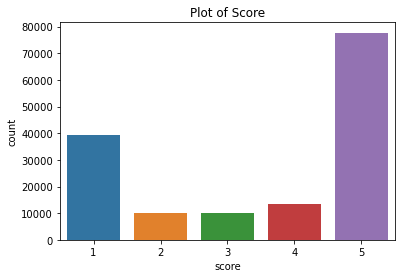

5    77717
1    39192
4    13288
2    10029
3     9974
Name: score, dtype: int64

In [4]:
# Data Loading: distribution of the data

sns.countplot(app_review['score'])
plt.title("Plot of Score")
plt.show()

app_review['score'].value_counts()

### 1.2 Data Processing


In [5]:
# Data Processing: understand the information in the data

app_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150200 entries, 0 to 150199
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   score    150200 non-null  int64 
 1   content  150198 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB


In [6]:
# Data Processing: remove the na entries

app_review = app_review.dropna()
app_review

,score,content
0,4,I love the Disney app and it so cool I can wat...
1,1,I have a new tablet running Android 11. Despit...
2,4,"always room for improvement, like adding a fox..."
3,5,Love this app so much
4,5,Thanks Disney
...,...,...
150195,5,it is an amazing app
150196,1,Lagging
150197,5,It lags sometimes but its overall a good app w...
150198,1,App won't go pass loading screen


In [7]:
# Data Processing: Remove Special Symbols and Punctuation using Regular Expressions

def pre_process(text):
    
    # to make every word to lowercase
    text = text.lower()
    
    # remove tags such as 
    text = re.sub("</?.*?>", " <> ", text)
    
    # remove special characters and digits
    text = re.sub("(\\d|\\W|_)+", " ", text)
    
    return text

# This to call the method declare above
clean_data = app_review['content'].apply(lambda x:pre_process(x))
clean_data

0         i love the disney app and it so cool i can wat...
1         i have a new tablet running android despite th...
2         always room for improvement like adding a fox ...
3                                     love this app so much
4                                             thanks disney
                                ...                        
150195                                 it is an amazing app
150196                                              lagging
150197    it lags sometimes but its overall a good app w...
150198                     app won t go pass loading screen
150199                                                     
Name: content, Length: 150198, dtype: object

In [8]:
# Data Processing: Tokenization using Natural Language Toolkit (NLTK)

# Tokenization is done to all the text in the DataFrame and saved as textTokenization now
clean_data = clean_data.apply(lambda x: word_tokenize(x))
clean_data

0         [i, love, the, disney, app, and, it, so, cool,...
1         [i, have, a, new, tablet, running, android, de...
2         [always, room, for, improvement, like, adding,...
3                               [love, this, app, so, much]
4                                          [thanks, disney]
                                ...                        
150195                           [it, is, an, amazing, app]
150196                                            [lagging]
150197    [it, lags, sometimes, but, its, overall, a, go...
150198             [app, won, t, go, pass, loading, screen]
150199                                                   []
Name: content, Length: 150198, dtype: object

In [9]:
# Data Processing: Removal of Stopwords using Natural Language Toolkit (NLTK)

nltk.download('stopwords')
stopwords = stopwords.words('english')

# This is the function that will be able to remove stopwords
def removing_stopwords(row):

    filtered_words = []
    
    for word in row:

        # Append words that are not found in stopwords into filtered_words
        if word not in stopwords:

            filtered_words.append(word)

    return filtered_words
        
clean_data = clean_data.apply(lambda x: removing_stopwords(x))
clean_data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0           [love, disney, app, cool, watch, anything]
1    [new, tablet, running, android, despite, keep,...
2    [always, room, improvement, like, adding, fox,...
3                                    [love, app, much]
4                                     [thanks, disney]
Name: content, dtype: object

In [10]:
# Data Processing: Apply lemmatization using Natural Language Toolkit (NLTK)

wnl = WordNetLemmatizer()

def lemmatization(row):

    wnl_lemmatized_tokens = []

    for word in row:

        wnl_lemmatized_tokens.append(wnl.lemmatize(word, pos='v'))
        
    return wnl_lemmatized_tokens

clean_data = clean_data.apply(lambda x: lemmatization(x))
clean_data.head()

0           [love, disney, app, cool, watch, anything]
1    [new, tablet, run, android, despite, keep, get...
2    [always, room, improvement, like, add, fox, ta...
3                                    [love, app, much]
4                                      [thank, disney]
Name: content, dtype: object

In [11]:
# Data Processing: Add the Cleanese Text into the data

app_review['clean_content'] = clean_data
app_review.head()

C:\Users\shani\AppData\Local\Temp\ipykernel_16452\1141314006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_review['clean_content'] = clean_data


,score,content,clean_content
0,4,I love the Disney app and it so cool I can wat...,"[love, disney, app, cool, watch, anything]"
1,1,I have a new tablet running Android 11. Despit...,"[new, tablet, run, android, despite, keep, get..."
2,4,"always room for improvement, like adding a fox...","[always, room, improvement, like, add, fox, ta..."
3,5,Love this app so much,"[love, app, much]"
4,5,Thanks Disney,"[thank, disney]"


In [12]:
# Data Processing: convert the score into numeric tensors


labels = np.array(app_review['score'])
score = []

for i in range(len(labels)):
    
    if labels[i] == 1:
        score.append(0)
        
    if labels[i] == 2:
        score.append(1)
        
    if labels[i] == 3:
        score.append(2)
        
    if labels[i] == 4:
        score.append(3)
        
    if labels[i] == 5:
        score.append(4)
        
score = np.array(score)
labels = tf.keras.utils.to_categorical(score, 5, dtype = "float32") # replace the data in the column
y = labels

y

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [13]:
# Data Processing: Convert the content and scores into numeric tensors

max_features = 10000 # only consider the top 10,000 words (vocabulary) in the dataset (dictionary)
max_len = 200 # cut reviews after 200 words

tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(app_review['clean_content'])
sequences = tokenizer.texts_to_sequences(app_review['clean_content'])
data = pad_sequences(sequences, maxlen = max_len)
X = data

X

array([[  0,   0,   0, ..., 122,   4,  58],
       [  0,   0,   0, ...,   2,  52,  27],
       [  0,   0,   0, ...,  65,   9,   6],
       ...,
       [  0,   0,   0, ...,  98,   2,   9],
       [  0,   0,   0, ..., 753,  15,  44],
       [  0,   0,   0, ...,   0,   0,   0]])

### 1.3 Data Sampling

In [14]:
# Data Sampling: Split the X & y into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [15]:
# Data Sampling: Print X_train Value

X_train

array([[  0,   0,   0, ...,   2,  37, 681],
       [  0,   0,   0, ...,   0,   0,   7],
       [  0,   0,   0, ...,   0,   0,   3],
       ...,
       [  0,   0,   0, ..., 347, 849,  39],
       [  0,   0,   0, ...,   5,  52,  27],
       [  0,   0,   0, ...,   0,   0, 122]])

In [16]:
# Data Sampling: Print y_train Value

y_train

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

## Step 2 – Develop a Sentiment Analysis Model (Individual: One Model Per Student)

### Model #1  (Student Name: Chua Kai Ling)

In [17]:
glove_dir = 'C:/Users/chuak/Downloads/NP SEM 3.1/DL A2/GROUP'

embeddings_index = {}

f = open(os.path.join(glove_dir, 'glove.6B.50d.txt'), encoding = "utf8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400001 word vectors.


In [22]:
embedding_dim = 50

embedding_matrix = np.zeros((max_features, embedding_dim))
word_index = tokenizer.word_index

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    
    if i < max_features:
        
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [23]:
print(embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.40037    -0.79645002  1.37629998 ...  0.18685     1.05229998
   0.38187   ]
 [ 1.21599996 -0.32358    -0.20624    ... -0.66465998 -0.61045998
   0.9921    ]
 ...
 [ 0.63761997  1.57379997 -0.95656002 ... -0.94990999  0.12507001
  -0.3265    ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [64]:
# Build the model

model = Sequential()

model.add(Embedding(max_features, embedding_dim, input_length = max_len))

model.add(LSTM(64, return_sequences = True))
model.add(LSTM(64, dropout = 0.2, recurrent_dropout = 0.2, return_sequences = True))
model.add(LSTM(32, dropout = 0.2, recurrent_dropout = 0.2))

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [65]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [66]:
# View the model's architecture

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 200, 50)           500000    
                                                                 
 lstm_20 (LSTM)              (None, 200, 64)           29440     
                                                                 
 lstm_21 (LSTM)              (None, 200, 64)           33024     
                                                                 
 lstm_22 (LSTM)              (None, 32)                12416     
                                                                 
 flatten_7 (Flatten)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 dense_15 (Dense)            (None, 5)                

In [67]:
# Compile the model

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [69]:
# Train the Model

history = model.fit(X_train, y_train,
                    epochs = 10,
                    batch_size = 32,
                    validation_split = 0.2)

Epoch 1/10
3004/3004 [==============================] - 1170s 389ms/step - loss: 0.8257 - acc: 0.7159 - val_loss: 0.8056 - val_acc: 0.7231
Epoch 2/10
3004/3004 [==============================] - 1194s 397ms/step - loss: 0.7702 - acc: 0.7326 - val_loss: 0.7674 - val_acc: 0.7341
Epoch 3/10
3004/3004 [==============================] - 1210s 403ms/step - loss: 0.7489 - acc: 0.7390 - val_loss: 0.7431 - val_acc: 0.7415
Epoch 4/10
3004/3004 [==============================] - 2118s 705ms/step - loss: 0.7326 - acc: 0.7443 - val_loss: 0.7492 - val_acc: 0.7409
Epoch 5/10
3004/3004 [==============================] - 2444s 813ms/step - loss: 0.7216 - acc: 0.7492 - val_loss: 0.7365 - val_acc: 0.7461
Epoch 6/10
3004/3004 [==============================] - 1571s 523ms/step - loss: 0.7112 - acc: 0.7523 - val_loss: 0.7344 - val_acc: 0.7459
Epoch 7/10
3004/3004 [==============================] - 1305s 434ms/step - loss: 0.7034 - acc: 0.7558 - val_loss: 0.7314 - val_acc: 0.7466
Epoch 8/10
3004/3004 [=====

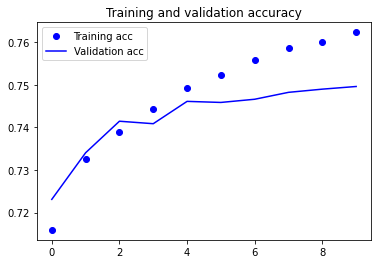

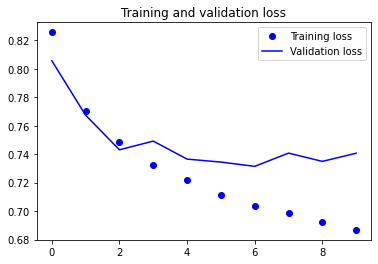

In [70]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [71]:
# Save the Model
model.save('text_model_1.h5')

### Model #2  (Student Name: Shanice Yeong Kai Wen)

In [18]:
review_list = app_review['clean_content'].tolist()
review_list[0]

['love', 'disney', 'app', 'cool', 'watch', 'anything']

In [19]:
#Save word2vec format (not binary)

w2vmodel = Word2Vec(review_list)
model_save_location = "reviews_notbinary"
w2vmodel.wv.save_word2vec_format(model_save_location)


In [20]:
word2vec = {}
with open('reviews_notbinary', encoding='UTF-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vec = np.asarray(values[1:], dtype='float32')
        word2vec[word] = vec

In [21]:
print('Found %s word vectors.' % len(word2vec))

Found 7092 word vectors.


In [25]:
word2vec

{'7091': array([100.], dtype=float32),
 'app': array([ 9.70119059e-01,  2.36381322e-01,  6.54569924e-01,  1.96700484e-01,
         1.80233553e-01, -6.14905179e-01,  9.87255573e-01,  2.02890992e-01,
        -7.28884488e-02, -2.43013054e-01,  5.31391144e-01, -6.16899431e-01,
        -1.16901290e+00,  5.54837406e-01,  2.92353421e-01,  1.08360970e+00,
         2.19506305e-02,  4.35660750e-01, -2.60680288e-01,  1.52327687e-01,
        -4.21962917e-01,  1.37722862e+00, -4.93239790e-01,  3.50822031e-01,
         3.13080907e-01, -1.03559252e-03, -7.91682482e-01,  8.42132151e-01,
         1.19910610e+00,  1.61073953e-02, -2.50803733e+00, -7.89336503e-01,
         2.57964969e-01,  8.88186157e-01, -1.36092460e+00, -7.33917296e-01,
         1.16578972e+00,  7.95271322e-02,  1.53248107e+00,  5.55920184e-01,
        -8.09078276e-01,  8.65319550e-01, -5.71583569e-01,  8.19974303e-01,
         9.48377401e-02,  1.03951418e+00, -9.93276119e-01,  2.73339689e-01,
         1.49573088e-01,  2.60069609e-01, 

In [22]:
num_words = len(list(tokenizer.word_index))
num_words

34835

In [25]:
embedding_size = 100 

embedding_matrix = np.random.uniform(-1, 1, (num_words, embedding_size))
for word, i in tokenizer.word_index.items():
    if i < num_words:
        embedding_vector = word2vec.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            
embedding_matrix.shape

(34835, 100)

In [31]:
model = Sequential()

model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    weights= [embedding_matrix],
                    input_length=max_len,        
                    trainable=True,
                    name='embedding_layer'))

model.add(layers.GRU(64, recurrent_dropout = 0.8))
model.add(Dropout(0.8))
model.add(layers.Dense(5,activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_layer (Embedding)  (None, 200, 100)         3483500   
                                                                 
 gru (GRU)                   (None, 64)                31872     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 5)                 325       
                                                                 
Total params: 3,515,697
Trainable params: 3,515,697
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Train the Model
optimizer = optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics=['acc'])

# Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint0 = ModelCheckpoint("text_model_2.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='auto', save_freq="epoch",save_weights_only=False)
history = model.fit(X_train, y_train, epochs=5, validation_split =0.2,callbacks=[checkpoint0])

Epoch 1/5
3004/3004 [==============================] - ETA: 0s - loss: 0.7532 - acc: 0.7432
Epoch 1: val_acc improved from -inf to 0.74896, saving model to text_model_2.h5
3004/3004 [==============================] - 224s 74ms/step - loss: 0.7532 - acc: 0.7432 - val_loss: 0.7168 - val_acc: 0.7490
Epoch 2/5
3004/3004 [==============================] - ETA: 0s - loss: 0.7354 - acc: 0.7481
Epoch 2: val_acc improved from 0.74896 to 0.75025, saving model to text_model_2.h5
3004/3004 [==============================] - 224s 74ms/step - loss: 0.7354 - acc: 0.7481 - val_loss: 0.7126 - val_acc: 0.7502
Epoch 3/5
3004/3004 [==============================] - ETA: 0s - loss: 0.7213 - acc: 0.7524
Epoch 3: val_acc improved from 0.75025 to 0.75125, saving model to text_model_2.h5
3004/3004 [==============================] - 225s 75ms/step - loss: 0.7213 - acc: 0.7524 - val_loss: 0.7113 - val_acc: 0.7512
Epoch 4/5
3004/3004 [==============================] - ETA: 0s - loss: 0.7088 - acc: 0.7571
Epoch 4:

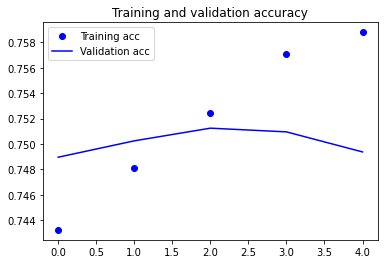

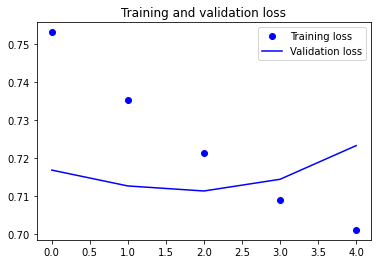

Average val accuracy: 0.7501581311225891
Average val loss: 0.7156745195388794


In [41]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(5)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
print("Average val accuracy: " + str(statistics.mean(val_acc)))
print("Average val loss: " + str(statistics.mean(val_loss)))

### Model #3  (Student Name: Ong Junwei)

In [19]:
# Build the Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN
from tensorflow.keras.layers import Dense

max_features = 10000
maxlen = 200

from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 64, input_length=maxlen))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 64)           640000    
                                                                 
 lstm_2 (LSTM)               (None, 200, 32)           12416     
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                                 
Total params: 660,901
Trainable params: 660,901
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Train the Model

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/10
1502/1502 [==============================] - 150s 97ms/step - loss: 0.7857 - acc: 0.7290 - val_loss: 0.7232 - val_acc: 0.7469
Epoch 2/10
1502/1502 [==============================] - 151s 101ms/step - loss: 0.7086 - acc: 0.7541 - val_loss: 0.7130 - val_acc: 0.7506
Epoch 3/10
1502/1502 [==============================] - 153s 102ms/step - loss: 0.6913 - acc: 0.7595 - val_loss: 0.7093 - val_acc: 0.7507
Epoch 4/10
1502/1502 [==============================] - 153s 102ms/step - loss: 0.6777 - acc: 0.7648 - val_loss: 0.7127 - val_acc: 0.7507
Epoch 5/10
1502/1502 [==============================] - 153s 102ms/step - loss: 0.6667 - acc: 0.7683 - val_loss: 0.7070 - val_acc: 0.7528
Epoch 6/10
1502/1502 [==============================] - 166s 111ms/step - loss: 0.6548 - acc: 0.7729 - val_loss: 0.7082 - val_acc: 0.7529
Epoch 7/10
1502/1502 [==============================] - 229s 153ms/step - loss: 0.6439 - acc: 0.7774 - val_loss: 0.7103 - val_acc: 0.7535
Epoch 8/10
1502/1502 [=============

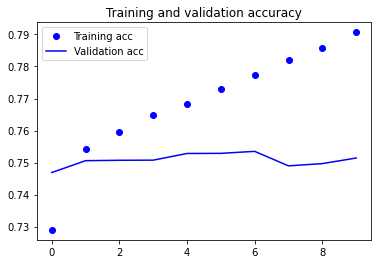

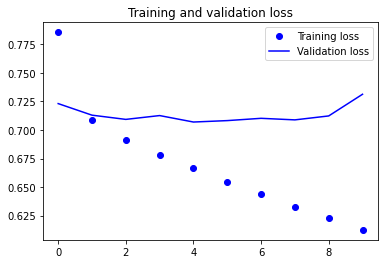

In [21]:
# Plot the Training and Validation Accuracy & Loss Scores

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
# Save the Model
model.save('text_model_3.h5')

### Model #4  (Student Name:Nur Harith Mirza)

In [23]:
# Build the Model
max_words = 10000 # We will only consider the top 10,000 words (vocabulary) in the dataset (dictionary)
max_len = 200 # We will cut reviews after 200 words
word_index = tokenizer.word_index

glove_dir = 'C:/Users/nurha/OneDrive/Documents/NP Online Learning/Sem 5/DL/DL Assignment 2/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='sigmoid',input_dim=64,kernel_regularizer=regularizers.l2(0.01)))
          
model.layers[0].set_weights([embedding_matrix])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 100)          1000000   
_________________________________________________________________
dropout (Dropout)            (None, 200, 100)          0         
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                640032    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 165       
Total params: 1,640,197
Trainable params: 1,640,197
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Train the Model
from tensorflow.keras import optimizers

training_samples = 20000  # We will be training on 20000 samples
validation_samples = 5000  # We will be validating on 5000 samples
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

model.compile(optimizer= optimizers.RMSprop(learning_rate=1e-3),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
3755/3755 [==============================] - 126s 33ms/step - loss: 0.2852 - acc: 0.7173 - val_loss: 0.2738 - val_acc: 0.7298
Epoch 2/10
3755/3755 [==============================] - 133s 35ms/step - loss: 0.2538 - acc: 0.7417 - val_loss: 0.2657 - val_acc: 0.7338
Epoch 3/10
3755/3755 [==============================] - 145s 38ms/step - loss: 0.2479 - acc: 0.7481 - val_loss: 0.2610 - val_acc: 0.7388
Epoch 4/10
3755/3755 [==============================] - 139s 37ms/step - loss: 0.2443 - acc: 0.7522 - val_loss: 0.2588 - val_acc: 0.7380
Epoch 5/10
3755/3755 [==============================] - 162s 43ms/step - loss: 0.2419 - acc: 0.7558 - val_loss: 0.2587 - val_acc: 0.7374
Epoch 6/10
3755/3755 [==============================] - 158s 42ms/step - loss: 0.2401 - acc: 0.7597 - val_loss: 0.2533 - val_acc: 0.7462
Epoch 7/10
3755/3755 [==============================] - 138s 37ms/step - loss: 0.2382 - acc: 0.7614 - val_loss: 0.2536 - val_acc: 0.7464
Epoch 8/10
3755/3755 [===================

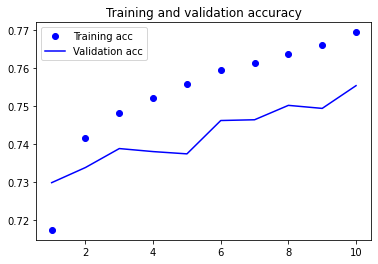

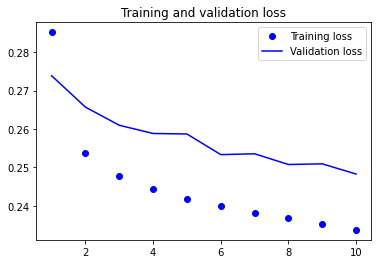

In [27]:
# Plot the Training and Validation Accuracy & Loss Scores
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
# Save the Model
model.save('text_model_4.h5')

### Model #5  (Student Name: Lee Junpeng Herman)

In [18]:
# Padding
from tensorflow.keras.preprocessing import sequence

print('Loading data...')
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(X_train, maxlen=max_len)
input_test = sequence.pad_sequences(X_test, maxlen=max_len)
print('input_train shape:', X_train.shape)
print('input_test shape:', X_test.shape)

Loading data...
120158 train sequences
30040 test sequences
Pad sequences (samples x time)
input_train shape: (120158, 200)
input_test shape: (30040, 200)


In [20]:
# Build the Model
from tensorflow.keras.layers import LSTM
from keras.layers import Dense

max_words = 10000 # We will only consider the top 10,000 words (vocabulary) in the dataset (dictionary)
max_len = 200 # We will cut reviews after 200 words

model = Sequential()
model.add(Embedding(max_words, 16, input_length=max_len))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           160000    
                                                                 
 lstm (LSTM)                 (None, 200, 32)           6272      
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 5)                 165       
                                                                 
Total params: 174,757
Trainable params: 174,757
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Train the Model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=15,
                    batch_size=50,
                    validation_split=0.2)

Epoch 1/15
1923/1923 [==============================] - 150s 77ms/step - loss: 0.8191 - acc: 0.7180 - val_loss: 0.7536 - val_acc: 0.7405
Epoch 2/15
1923/1923 [==============================] - 157s 82ms/step - loss: 0.7239 - acc: 0.7487 - val_loss: 0.7256 - val_acc: 0.7470
Epoch 3/15
1923/1923 [==============================] - 146s 76ms/step - loss: 0.7130 - acc: 0.7524 - val_loss: 0.7181 - val_acc: 0.7479
Epoch 4/15
1923/1923 [==============================] - 151s 78ms/step - loss: 0.6994 - acc: 0.7570 - val_loss: 0.7239 - val_acc: 0.7500
Epoch 5/15
1923/1923 [==============================] - 152s 79ms/step - loss: 0.6921 - acc: 0.7604 - val_loss: 0.7104 - val_acc: 0.7496
Epoch 6/15
1923/1923 [==============================] - 147s 77ms/step - loss: 0.6841 - acc: 0.7630 - val_loss: 0.7105 - val_acc: 0.7505
Epoch 7/15
1923/1923 [==============================] - 146s 76ms/step - loss: 0.6772 - acc: 0.7651 - val_loss: 0.7107 - val_acc: 0.7508
Epoch 8/15
1923/1923 [===================

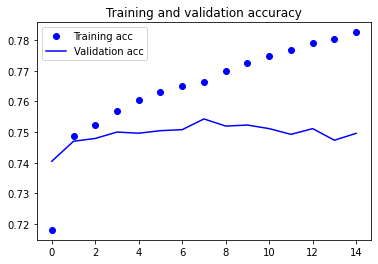

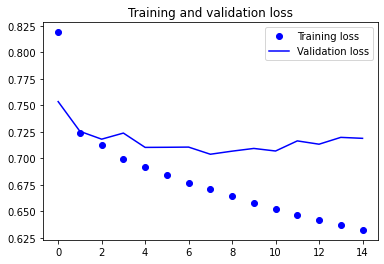

In [22]:
# Plot the Training and Validation Accuracy & Loss Scores
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
# Save the Model
model.save('text_model_5.h5')

## Step 3 – Evaluate the Model using Testing Data (Individual & Group)

In [17]:
# Model #1 (replicate where necessary for other models)
model1 = keras.models.load_model('text_model_1.h5')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 2)

OSError: No file or directory found at text_model_1.h5

In [18]:
# Model #2 (replicate where necessary for other models)
model2 = keras.models.load_model('text_model_2.h5')

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model2.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model2.predict(X_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
235/235 [==============================] - 7s 29ms/step - loss: 0.6669 - acc: 0.7661
test loss, test acc: [0.6668863296508789, 0.7661118507385254]
Generate predictions for 3 samples
predictions shape: (3, 5)


In [30]:
# Model #3 (replicate where necessary for other models)
model3 = keras.models.load_model('text_model_3.h5')

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model3.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model3.predict(X_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
235/235 [==============================] - 8s 32ms/step - loss: 0.6363 - acc: 0.7828
test loss, test acc: [0.6363356709480286, 0.7827895879745483]
Generate predictions for 3 samples
predictions shape: (3, 5)


In [21]:
# Model #4 (replicate where necessary for other models)
model4 = keras.models.load_model('text_model_4.h5')

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model4.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model4.predict(X_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
235/235 [==============================] - 1s 4ms/step - loss: 0.5005 - acc: 0.5011
test loss, test acc: [0.5004907250404358, 0.5010652542114258]
Generate predictions for 3 samples
predictions shape: (3, 5)


In [22]:
# Model #5 (replicate where necessary for other models)
model5 = keras.models.load_model('text_model_5.h5')

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model5.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model5.predict(X_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
235/235 [==============================] - 9s 32ms/step - loss: 0.6463 - acc: 0.7769
test loss, test acc: [0.6463040113449097, 0.7769307494163513]
Generate predictions for 3 samples
predictions shape: (3, 5)


In [23]:
# Save the Best Model
model2.save('text_model_best.h5')

## Step 4 – Use the Best Model to make prediction (Group)

In [24]:
best_model = keras.models.load_model('text_model_best.h5')

In [25]:
# takes the user input
text_input = np.array([input()])

 The shows and movies are great (aside from the annoying woke plugs here and there), but the app is garbage. If I am streaming and leave the video paused long enough for the screen to time out and lock the phone, it will completely screw the app up to where I can't stream again and gives error messages no matter what. I literally have to clear cache, clear app data, uninstall app, restart the phone, and the re-download the app again every time this happens just to continuento stream.


In [26]:
predictions = best_model.predict(X_test)

In [27]:
# convert the user input into numeric tensor
sentiment = ['1','2','3', '4','5']
sequence = tokenizer.texts_to_sequences(text_input)
test = pad_sequences(sequence, maxlen=max_len)

# show the model output using predict function
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

'1'